In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Load the dataset
data = pd.read_csv(r'C:\Amit Dubli\ExcelR\ExcelR assignments & material\Data Science\01 Assignments\14 Decision Trees\Company_Data.csv')

In [51]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [52]:
# Convert "Sales" to categorical "HighSales" based on a threshold
threshold = 8  # Define your threshold here
data["HighSales"] = data["Sales"].apply(lambda x: 'Yes' if x > threshold else 'No')

In [53]:
# Encode categorical variables
label_encoder = LabelEncoder()
data["ShelveLoc"] = label_encoder.fit_transform(data["ShelveLoc"])
data["Urban"] = label_encoder.fit_transform(data["Urban"])
data["US"] = label_encoder.fit_transform(data["US"])

In [54]:
# Split features and target variable
features = data.drop(["Sales", "HighSales"], axis=1)
target = data["HighSales"]

In [55]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [56]:
# Instantiate the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [57]:
# Fit the model on the training data
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [58]:
# Predict on the testing data
predictions = clf.predict(X_test)

In [59]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

In [60]:
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.775
Classification Report:
               precision    recall  f1-score   support

          No       0.77      0.84      0.80        43
         Yes       0.79      0.70      0.74        37

    accuracy                           0.78        80
   macro avg       0.78      0.77      0.77        80
weighted avg       0.78      0.78      0.77        80



#  the model has an accuracy of 0.775, which means that approximately 77.5% of the instances were correctly classified.

# Interpreting the Classification Report:

# Precision: The model's ability to correctly predict positive instances (Yes) is approximately 79%. For "Yes" predictions, about 79% are truly positive.

# Recall: The model correctly identifies around 70% of actual positive instances (Yes). This is the true positive rate.

# F1-Score: The F1-score, which balances precision and recall, is around 0.74 for the "Yes" class. 

In [61]:
# Feature Importance analysis
feature_importances = clf.feature_importances_

In [62]:
# Print feature importances
for feature, importance in zip(features.columns, feature_importances):
    print(f"{feature}: {importance}")

CompPrice: 0.10611038532625404
Income: 0.10142369674030477
Advertising: 0.1355294810263756
Population: 0.09153113296992654
Price: 0.2280534347370004
ShelveLoc: 0.11819363630029919
Age: 0.1356517080640222
Education: 0.05563450550932676
Urban: 0.014420847633191973
US: 0.013451171693298604


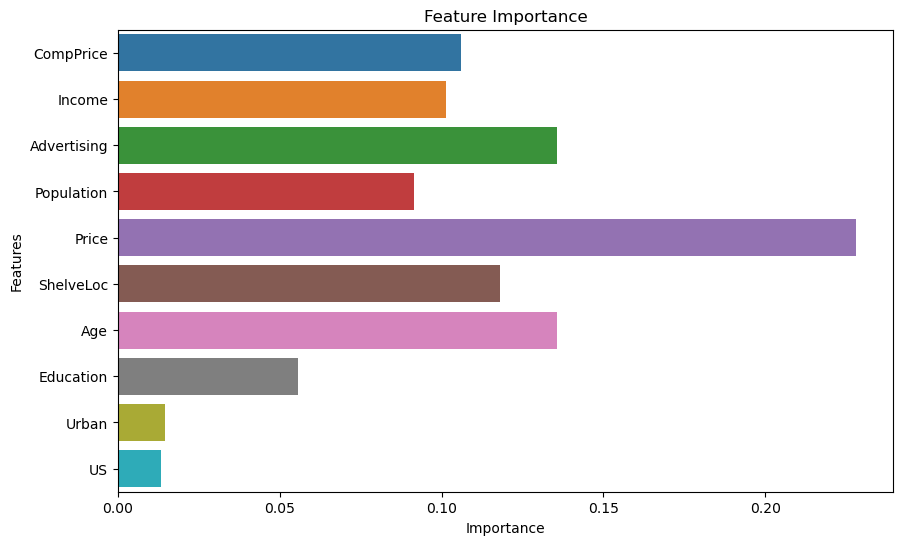

In [63]:
# Print and visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features.columns)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Feature importance shows the importance of each feature in the dataset, and so we can say that Price has the highest impact on predicting high sales as per the data.

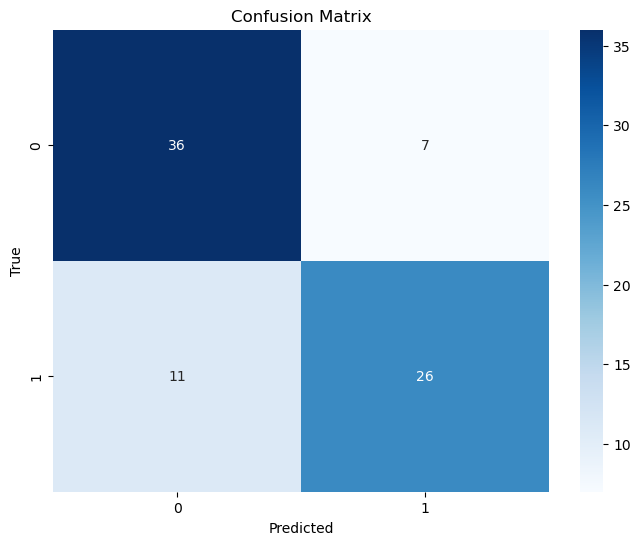

In [64]:
# Confusion Matrix visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Values in the confusion matrix signifies as below:

# True Negative (TN): there are 36 instances that were correctly predicted as "No" (negative class).

# False Positive (FP): there are 7 instances that were predicted as "Yes" (positive class) but were actually "No" (negative class).

# False Negative (FN): there are 11 instances that were predicted as "No" (negative class) but were actually "Yes" (positive class).

# True Positive (TP): there are 26 instances that were correctly predicted as "Yes" (positive class).

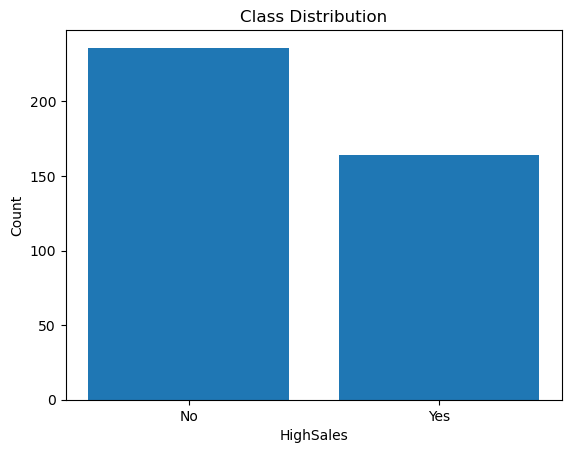

Class Ratios:
No     0.59
Yes    0.41
Name: HighSales, dtype: float64


In [65]:
# Count instances in each class
class_counts = data["HighSales"].value_counts()

# Calculate class ratios
class_ratios = class_counts / len(data)

# Visualize class distribution
plt.bar(class_counts.index, class_counts.values)
plt.xlabel("HighSales")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

print("Class Ratios:")
print(class_ratios)

In [66]:
class_counts

No     236
Yes    164
Name: HighSales, dtype: int64

# Based on the class counts the classes are imbalanced. In this case, the class "No" has significantly more instances than the class "Yes." Imbalanced classes can affect the performance of machine learning algorithms, as models tend to be biased towards the majority class. It's important to address this imbalance to ensure that the model doesn't favor one class over the other.

In [67]:
pip install imbalanced-learn

In [68]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [69]:
# Separate features and target variable
X = data.drop(["HighSales"], axis=1)
y = data["HighSales"]

In [70]:
X

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [71]:
y

0      Yes
1      Yes
2      Yes
3       No
4       No
      ... 
395    Yes
396     No
397     No
398     No
399    Yes
Name: HighSales, Length: 400, dtype: object

In [72]:
# Display class distribution before resampling
print("Class distribution before resampling:", Counter(y))

Class distribution before resampling: Counter({'No': 236, 'Yes': 164})


In [73]:
# Oversampling using RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_over, y_over = over_sampler.fit_resample(X, y)

In [74]:
# Display class distribution after oversampling
print("Class distribution after oversampling:", Counter(y_over))

Class distribution after oversampling: Counter({'Yes': 236, 'No': 236})


In [75]:
# Undersampling using RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
X_under, y_under = under_sampler.fit_resample(X, y)

In [76]:
# Display class distribution after undersampling
print("Class distribution after undersampling:", Counter(y_under))

Class distribution after undersampling: Counter({'No': 164, 'Yes': 164})


In [77]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [78]:
# Display class distribution before SMOTE
print("Class distribution before SMOTE:", Counter(y))

Class distribution before SMOTE: Counter({'No': 236, 'Yes': 164})


In [79]:
# Apply SMOTE for synthetic data generation
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

In [80]:
# Display class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_smote))

Class distribution after SMOTE: Counter({'Yes': 236, 'No': 236})


# SMOTE generates synthetic instances for the minority class by interpolating between existing instances. This helps balance the class distribution and can improve model performance on imbalanced datasets. 